# Plotting with seaborn

In [2]:
import pandas as pd
%matplotlib inline

reviews = pd.read_csv("./winemag-data_first150k.csv", index_col=0)
import seaborn as sns

# Countplot
The pandas bar chart becomes a seaborn countplot.

In [3]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
reviews.sort_index(1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


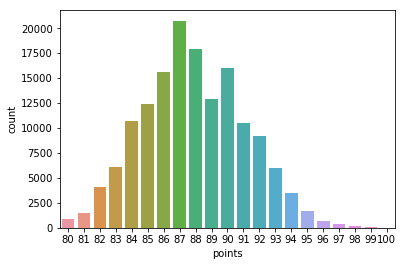

In [5]:
sns.countplot(reviews['points'])

Comparing this chart with the bar chart from two notebooks ago, we find that, unlike pandas, seaborn doesn't require us to shape the data for it via value_counts; the countplot (true to its name) aggregates the data for us!

seaborn doesn't have a direct analogue to the line or area chart. Instead, the package provides a kdeplot:

# KDE Plot

C:\Users\dipverma\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


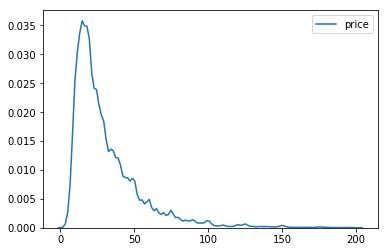

In [6]:
sns.kdeplot(reviews.query('price < 200').price)

KDE, short for "kernel density estimate", is a statistical technique for smoothing out data noise. It addresses an important fundamental weakness of a line chart: it will buff out outlier or "in-betweener" values which would cause a line chart to suddenly dip.

For example, suppose that there was just one wine priced 19.93$, but several hundred prices 20.00$. If we were to plot the value counts in a line chart, our line would dip very suddenly down to 1 and then back up to around 1000 again, creating a strangely "jagged" line. The line chart with the same data, shown below for the purposes of comparison, has exactly this problem!

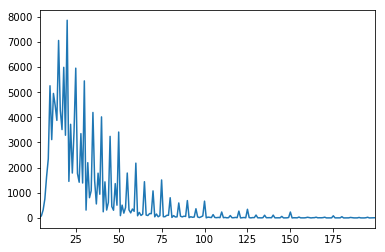

In [7]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

A KDE plot is better than a line chart for getting the "true shape" of interval data. In fact, I recommend always using it instead of a line chart for such data.

However, it's a worse choice for ordinal categorical data. A KDE plot expects that if there are 200 wine rated 85 and 400 rated 86, then the values in between, like 85.5, should smooth out to somewhere in between (say, 300). However, if the value in between can't occur (wine ratings of 85.5 are not allowed), then the KDE plot is fitting to something that doesn't exist. In these cases, use a line chart instead.

KDE plots can also be used in two dimensions.

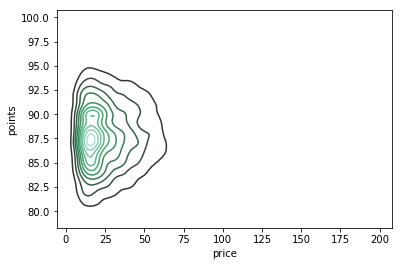

In [8]:
subset = reviews[reviews['price'] < 200]
sns.kdeplot(subset.price.dropna().sample(5000),subset.points.dropna().sample(5000))

C:\Users\dipverma\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


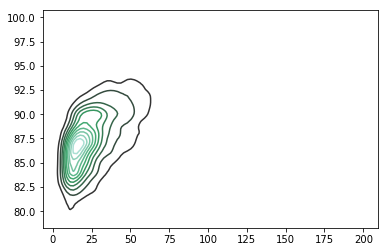

In [9]:
sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

# Distplot
The seaborn equivalent to a pandas histogram is the distplot. Here's an example:

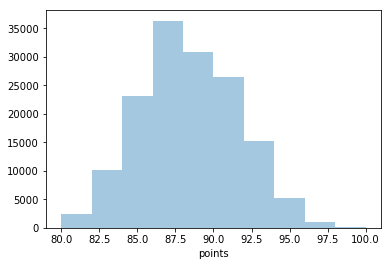

In [10]:
sns.distplot(reviews['points'], bins=10, kde=False)

# Scatterplot and hexplot
To plot two variables against one another in seaborn, we use jointplot.

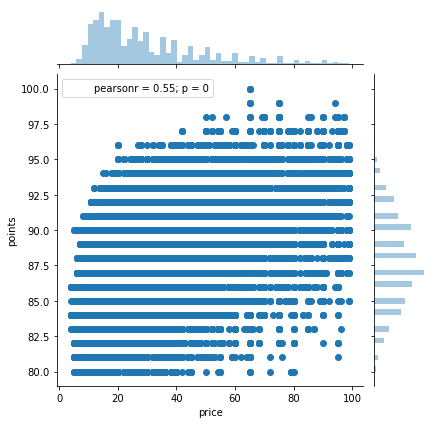

In [11]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])

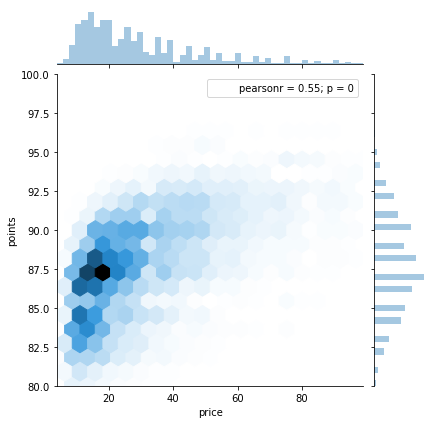

In [12]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', 
              gridsize=20)

# Boxplot and violin plot
seaborn provides a boxplot function. It creates a statistically useful plot that looks like this:

In [ ]:
reviews.head()

In [ ]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df
)

In [ ]:
reviews.variety.value_counts().head(5).index